In [7]:
#Set up with the most important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))''' 

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        #print(os.path.join(dirname, filename))"

In [8]:
train_dir = 'C:/Users/hlawa/OneDrive/Desktop/final ai/train' 
validation_dir = 'C:/Users/hlawa/OneDrive/Desktop/final ai/valid' 
test_dir = 'C:/Users/hlawa/OneDrive/Desktop/final ai/test'

In [9]:
#Import pathlib
import pathlib

#Define train, test, validation data paths dir 
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)
validation_dir = pathlib.Path(validation_dir)

In [10]:
#count the number of imagenes in the train, test and validation dir 
train_image_count = len(list(train_dir.glob('*/*.jpg')))
test_image_count = len(list(test_dir.glob('*/*.jpg')))
validation_image_count = len(list(validation_dir.glob('*/*.jpg')))

print('There are ', train_image_count, 'images in the train dir.')
print('There are ', test_image_count, 'images in the test dir.')
print('There are ', validation_image_count, 'images in the validation dir.')

There are  12594 images in the train dir.
There are  500 images in the test dir.
There are  500 images in the validation dir.


In [11]:
#Import PIL to visualize an image axample
import PIL
import PIL.Image

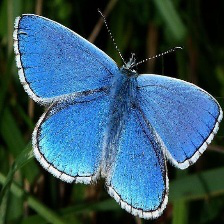

In [12]:
#Image examples
butterflies = list(train_dir.glob('ADONIS/*'))
PIL.Image.open(str(butterflies[0]))

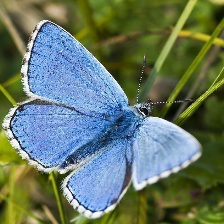

In [97]:
PIL.Image.open(str(butterflies[2]))

In [98]:
#Define some parameters
batch_size = 32
img_height = 224
img_width = 224
n_train = 9285
steps_per_epoch = n_train//batch_size

In [99]:
#Trainset 
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12594 files belonging to 100 classes.


In [100]:
#Testset
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [101]:
#Validationset
validation_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [102]:
#Check that all sets have the same clases
#List of classes in each dataset
train_class_names = train_ds.class_names
test_class_names = test_ds.class_names
validation_class_names = validation_ds.class_names

#Check tha all lists have the same classes 
print(train_class_names == test_class_names == validation_class_names)

True


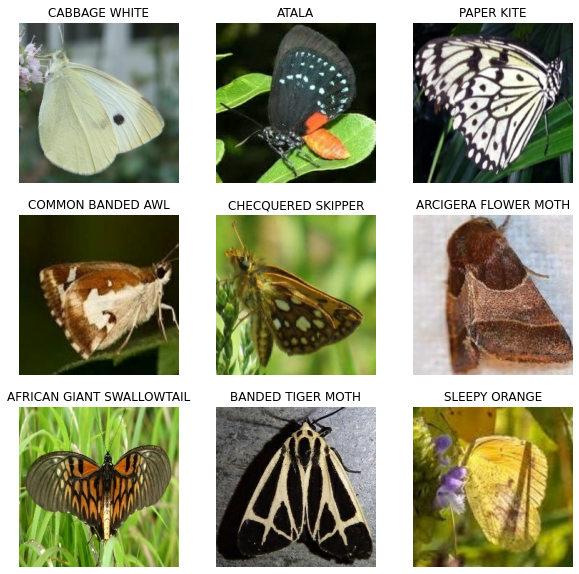

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

In [104]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [105]:
#Def function to compile and train the models
def compile_and_train(model, name):
  #compile the model

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
  #train the model 
  history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs = 20)
  return history

In [106]:
#Def the number of classes 
num_classes = len(train_class_names)

In [107]:
#Dict to store the histories 
size_histories = {}

# CNN

In [21]:
#Large model
large_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [22]:
#Train and store the history form the large model
size_histories['Large'] = compile_and_train(large_model, 'sizes/Large') 

Epoch 1/20
394/394 [==============================] - 552s 1s/step - loss: 3.9573 - accuracy: 0.1000 - val_loss: 3.0327 - val_accuracy: 0.2560
Epoch 2/20
394/394 [==============================] - 531s 1s/step - loss: 2.4467 - accuracy: 0.3830 - val_loss: 1.8486 - val_accuracy: 0.5500
Epoch 3/20
394/394 [==============================] - 514s 1s/step - loss: 1.6023 - accuracy: 0.5700 - val_loss: 1.4038 - val_accuracy: 0.6280
Epoch 4/20
394/394 [==============================] - 531s 1s/step - loss: 1.1265 - accuracy: 0.6923 - val_loss: 1.4528 - val_accuracy: 0.6360
Epoch 5/20
394/394 [==============================] - 483s 1s/step - loss: 0.8380 - accuracy: 0.7608 - val_loss: 1.4333 - val_accuracy: 0.6600
Epoch 6/20
394/394 [==============================] - 458s 1s/step - loss: 0.6307 - accuracy: 0.8157 - val_loss: 1.5884 - val_accuracy: 0.6660
Epoch 7/20
394/394 [==============================] - 462s 1s/step - loss: 0.5107 - accuracy: 0.8440 - val_loss: 1.7977 - val_accuracy: 0.6660

Model Size: Large


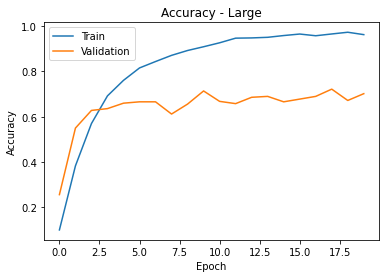

In [26]:
#Accuracy values for train and validation data
import matplotlib.pyplot as plt

# Function to plot the training history
def plot_training_history(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Display the accuracy for each model size
for size, history in size_histories.items():
    print(f"Model Size: {size}")
    plot_training_history(history, f"Accuracy - {size}")
mean_absolute_error = history.history['accuracy']
val_mean_absolute_error = history.history['val_accuracy']

#Loss function values for train and validation data
loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
# Get number of epochs
epochs   = range(len(mean_absolute_error))

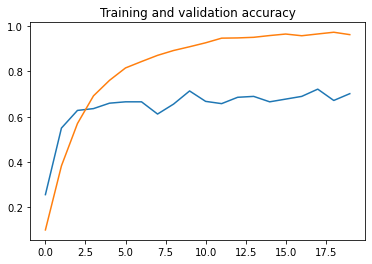

In [28]:
#Plot the model accuracy
plt.plot(epochs, val_mean_absolute_error)
plt.plot(epochs, mean_absolute_error)
plt.title ('Training and validation accuracy')
plt.show()


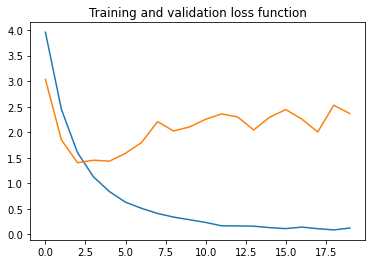

In [29]:
#Plot the model loss function 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title ('Training and validation loss function')
plt.show()


In [33]:
#Check the accuracy
test_loss, test_acc = large_model.evaluate(validation_ds, verbose=2)
print('\nTest accuracy:', test_acc)

16/16 - 4s - loss: 2.3507 - accuracy: 0.7160 - 4s/epoch - 252ms/step

Test accuracy: 0.7160000205039978


# Restnet 50


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import os

In [40]:
batch_size = 32
img_height = 64
img_width = 64
n_train = 9285
steps_per_epoch = n_train//batch_size

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12594 files belonging to 100 classes.


In [42]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [43]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

base_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=100,
                   weights='imagenet')

94765736/94765736 [==============================] - 28s 0us/step


In [46]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [47]:
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(100, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24,688,100
Trainable params: 24,634,980
Non-trainable params: 53,120
_________________________________________________________________


In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=validation_ds)

Epoch 1/20
394/394 [==============================] - 618s 2s/step - loss: 3.3793 - accuracy: 0.2793 - val_loss: 1.1704 - val_accuracy: 0.7180
Epoch 2/20
394/394 [==============================] - 588s 1s/step - loss: 1.1519 - accuracy: 0.7091 - val_loss: 0.5891 - val_accuracy: 0.8280
Epoch 3/20
394/394 [==============================] - 596s 2s/step - loss: 0.5515 - accuracy: 0.8516 - val_loss: 0.5117 - val_accuracy: 0.8740
Epoch 4/20
394/394 [==============================] - 584s 1s/step - loss: 0.3098 - accuracy: 0.9114 - val_loss: 0.5088 - val_accuracy: 0.8880
Epoch 5/20
394/394 [==============================] - 584s 1s/step - loss: 0.2205 - accuracy: 0.9394 - val_loss: 0.5085 - val_accuracy: 0.9000
Epoch 6/20
394/394 [==============================] - 587s 1s/step - loss: 0.1801 - accuracy: 0.9479 - val_loss: 0.5497 - val_accuracy: 0.8920
Epoch 7/20
394/394 [==============================] - 586s 1s/step - loss: 0.1555 - accuracy: 0.9570 - val_loss: 0.5880 - val_accuracy: 0.8800

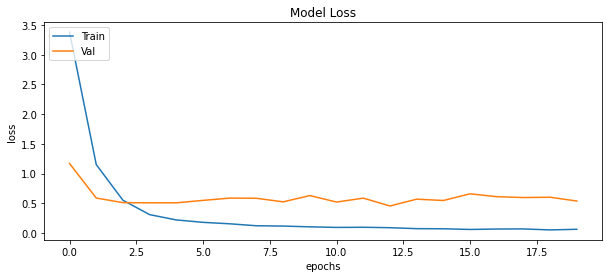

In [51]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

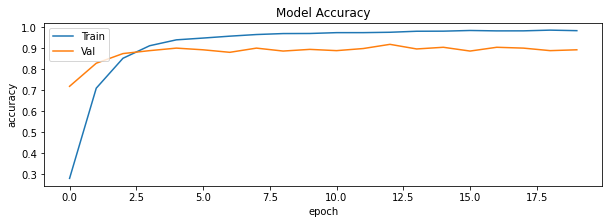

In [52]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [53]:
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

16/16 [==============================] - 3s 153ms/step


In [54]:
result = model.evaluate(test_ds)
print("Test loss, test accuracy:", result)

16/16 [==============================] - 3s 163ms/step - loss: 0.4633 - accuracy: 0.9160
Test loss, test accuracy: [0.46333742141723633, 0.9160000085830688]


# VGG 16


In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
# Define constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 75
NUM_EPOCHS = 10

In [16]:
# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

In [17]:
# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False

In [18]:
# Create a new model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
# Set the paths to the dataset directories
train_dir = 'train_dir'
test_dir = 'test_dir'

In [30]:
# Generate batches of training and test data
train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                                                  class_mode='categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train_dir'

In [31]:
# Train the model
model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=test_generator)

NameError: name 'train_generator' is not defined

In [24]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

NameError: name 'test_generator' is not defined

In [26]:
from sklearn.metrics import classification_report

# Get the predictions for the test dataset
y_pred_custom = model.predict(test_ds).argmax(axis=1)

# Get the true labels for the test dataset
y_true_custom = test_ds.classes

# Generate the classification report for the Custom CNN
report_custom = classification_report(y_true_custom, y_pred_custom, target_names=class_names)

# Print the classification report for the Custom CNN
print("Custom CNN:")
print(report_custom)

# Evaluate the Custom CNN model on the test dataset
test_loss_custom, test_acc_custom = model.evaluate(test_ds, verbose=2)
print('\nCustom CNN Test accuracy:', test_acc_custom)


NameError: name 'test_ds' is not defined

In [ ]:
# Get the predictions for the test dataset using ResNet50
y_pred_resnet = model.predict(test_ds).argmax(axis=1)

# Get the true labels for the test dataset
y_true_resnet = test_ds.classes

# Generate the classification report for ResNet50
report_resnet = classification_report(y_true_resnet, y_pred_resnet, target_names=class_names)

# Print the classification report for ResNet50
print("ResNet50:")
print(report_resnet)

# Evaluate the ResNet50 model on the test dataset
test_loss_resnet, test_acc_resnet = model.evaluate(test_ds, verbose=2)
print('\nResNet50 Test accuracy:', test_acc_resnet) 